In [103]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [104]:
#Load data for train and test
train = pd.read_csv('C:/Users/Lenovo/Desktop/IPY/HousePricingTutorial-Series2_train.csv')
test = pd.read_csv('C:/Users/Lenovo/Desktop/IPY/HousePricingTutorial-Series2_test.csv')

In [105]:
#Shape of train data
train.shape

(1460, 81)

In [106]:
#Shape of test data
test.shape

(1459, 80)

Skew is: 0.12134661989685333


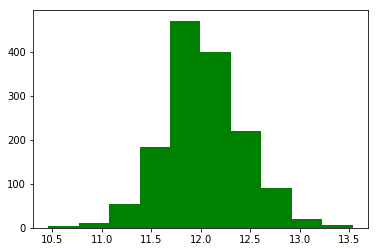

In [107]:
train['SalePrice'] = np.log1p(train['SalePrice'])

target = train['SalePrice']
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

In [108]:
#Finding Numerical Columns
numeric_features = train.select_dtypes(include=[np.number])
#numeric_features.dtypes

In [109]:
#Finding the first five features are the most positively correlated with SalePrice
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

SalePrice      1.000000
OverallQual    0.817185
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
Name: SalePrice, dtype: float64 



In [110]:
#Wow Feeling !!!

In [111]:
#Understanding NULL values.
Isnull=train.isnull().sum()
Isnull.sort_values(inplace=True, ascending=False)
print(Isnull)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [112]:
#Examining the NULL values and filling with appropriate values:
#There are 19 columns with NULLs.

# PoolQC           1453
# MiscFeature      1406
# Alley            1369
# Fence            1179
# FireplaceQu       690
# LotFrontage       259
# GarageCond         81
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
# GarageQual         81
# BsmtExposure       38
# BsmtFinType2       38
# BsmtFinType1       37
# BsmtCond           37
# BsmtQual           37
# MasVnrArea          8
# MasVnrType          8
# Electrical          1


train['PoolQC'] = train['PoolQC'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [113]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(int(0))
train['GarageArea'] = train['GarageArea'].fillna(int(0))
train['GarageCars'] = train['GarageCars'].fillna(int(0))
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [114]:
#########################################################################################################

In [115]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [116]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [117]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

In [118]:
#########################################################################################################

In [119]:
#Categorical variables are known to hide lot of interesting information in a data set.

In [120]:
#To learn more on Categorical Variables - 
#https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

In [121]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [122]:
len(train.columns)

80

In [ ]:
##SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
##MSSubClass: The building class
##MSZoning: The general zoning classification
##LotFrontage: Linear feet of street connected to property
##LotArea: Lot size in square feet
##Street: Type of road access
##Alley: Type of alley access
##LotShape: General shape of property
##LandContour: Flatness of the property
##Utilities: Type of utilities available
##LotConfig: Lot configuration
##LandSlope: Slope of property
##Neighborhood: Physical locations within Ames city limits
##Condition1: Proximity to main road or railroad
##Condition2: Proximity to main road or railroad (if a second is present)
##BldgType: Type of dwelling
##HouseStyle: Style of dwelling
##OverallQual: Overall material and finish quality
##OverallCond: Overall condition rating
##YearBuilt: Original construction date
##YearRemodAdd: Remodel date
##RoofStyle: Type of roof
##RoofMatl: Roof material
##Exterior1st: Exterior covering on house
##Exterior2nd: Exterior covering on house (if more than one material)
##MasVnrType: Masonry veneer type
##MasVnrArea: Masonry veneer area in square feet
##ExterQual: Exterior material quality
##ExterCond: Present condition of the material on the exterior
##Foundation: Type of foundation
##BsmtQual: Height of the basement
##BsmtCond: General condition of the basement
##BsmtExposure: Walkout or garden level basement walls
##BsmtFinType1: Quality of basement finished area
##BsmtFinSF1: Type 1 finished square feet
##BsmtFinType2: Quality of second finished area (if present)
##BsmtFinSF2: Type 2 finished square feet
##BsmtUnfSF: Unfinished square feet of basement area
##TotalBsmtSF: Total square feet of basement area
##Heating: Type of heating
##HeatingQC: Heating quality and condition
##CentralAir: Central air conditioning
##Electrical: Electrical system
##1stFlrSF: First Floor square feet
##2ndFlrSF: Second floor square feet
##LowQualFinSF: Low quality finished square feet (all floors)
##GrLivArea: Above grade (ground) living area square feet
##BsmtFullBath: Basement full bathrooms
##BsmtHalfBath: Basement half bathrooms
##FullBath: Full bathrooms above grade
##HalfBath: Half baths above grade
##Bedroom: Number of bedrooms above basement level
##Kitchen: Number of kitchens
##KitchenQual: Kitchen quality
##TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##Functional: Home functionality rating
##Fireplaces: Number of fireplaces
##FireplaceQu: Fireplace quality
##GarageType: Garage location
##GarageYrBlt: Year garage was built
##GarageFinish: Interior finish of the garage
##GarageCars: Size of garage in car capacity
##GarageArea: Size of garage in square feet
##GarageQual: Garage quality
##GarageCond: Garage condition
##PavedDrive: Paved driveway
##WoodDeckSF: Wood deck area in square feet
##OpenPorchSF: Open porch area in square feet
##EnclosedPorch: Enclosed porch area in square feet
##3SsnPorch: Three season porch area in square feet
##ScreenPorch: Screen porch area in square feet
##PoolArea: Pool area in square feet
##PoolQC: Pool quality
##Fence: Fence quality
##MiscFeature: Miscellaneous feature not covered in other categories
##MiscVal: $Value of miscellaneous feature
##MoSold: Month Sold
##YrSold: Year Sold
##SaleType: Type of sale
##SaleCondition: Condition of sale

In [123]:
#Out of these columns, we are selecting a few for our analysis purpose.
selectedColumns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [124]:
len(selectedColumns)

47

In [ ]:
#The remianing columns are:



In [125]:
train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

In [126]:
from sklearn.preprocessing import LabelEncoder
for column in selectedColumns:
    label = LabelEncoder() 
    selectedColumns.fit(list(train[c].values)) 
    train[column] = label.transform(list(train[c].values))
    

In [127]:
train['GarageQual'].unique()

array([5, 1, 2, 3, 0, 4], dtype=int64)

In [128]:
#Take targate variable into y
y = train['SalePrice']

In [129]:
#Delete the saleprice
del train['SalePrice']

In [130]:
#Take their values in X and y
X = train.values
y = y.values

In [131]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [132]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.62221633]
Real value 11.767187766223199


In [134]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.26708677161422


### RandomForestRegression

In [259]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [260]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [261]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  90.56618132951972
